In [1]:
import os
os.chdir('E:\\Python Project - Bank Lending')
os.getcwd()

'E:\\Python Project - Bank Lending'

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score

In [3]:
from sklearn.linear_model import LogisticRegression

# Data Sourcing

In [4]:
#df = pd.read_csv("XYZCorp_LendingData.txt", sep='\t')
%time df = pd.read_table('XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

Wall time: 50.4 s


In [5]:
df.shape

(855969, 73)

In [6]:
#df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y%m')))
#df = df.sort_values('issue_d')
#df = df.set_index('issue_d')

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
loan = df
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [9]:
#looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The target variable, which we want to compare across the independent variables, is loan status. The strategy is to figure out and 
compare the average default rates across various independent variables and identify the ones that affect default rate the most.


# Data Cleaning
Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [10]:
loan.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [11]:
#percentage of missing value in each column
round(loan.isnull().sum()/len(loan),2)*100

id                               0.0
member_id                        0.0
loan_amnt                        0.0
funded_amnt                      0.0
funded_amnt_inv                  0.0
term                             0.0
int_rate                         0.0
installment                      0.0
grade                            0.0
sub_grade                        0.0
emp_title                        6.0
emp_length                       5.0
home_ownership                   0.0
annual_inc                       0.0
verification_status              0.0
issue_d                          0.0
pymnt_plan                       0.0
desc                            86.0
purpose                          0.0
title                            0.0
zip_code                         0.0
addr_state                       0.0
dti                              0.0
delinq_2yrs                      0.0
earliest_cr_line                 0.0
inq_last_6mths                   0.0
mths_since_last_delinq          51.0
m

In [12]:
missing_columns = loan.columns[(loan.isnull().sum()/len(loan))*100 >90]
print(missing_columns)

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')


In [13]:
loan = loan.drop(missing_columns,axis=1)
print(loan.shape)

(855969, 56)


In [14]:
#again check the missing values percentage
round(loan.isnull().sum()/len(loan),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
term                            0.0
int_rate                        0.0
installment                     0.0
grade                           0.0
sub_grade                       0.0
emp_title                       6.0
emp_length                      5.0
home_ownership                  0.0
annual_inc                      0.0
verification_status             0.0
issue_d                         0.0
pymnt_plan                      0.0
desc                           86.0
purpose                         0.0
title                           0.0
zip_code                        0.0
addr_state                      0.0
dti                             0.0
delinq_2yrs                     0.0
earliest_cr_line                0.0
inq_last_6mths                  0.0
mths_since_last_delinq         51.0
mths_since_last_record      

In [15]:
#there are now 5 columns having approx more than 30% missing value
#lets see some of the entries in the columns
loan.loc[:, ['desc','mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog']].head()

,desc,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog
0,Borrower added on 12/22/11 > I need to upgra...,NaN,NaN,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0,NaN,NaN
4,Borrower added on 12/21/11 > I plan on combi...,38.0,NaN,NaN


In [16]:
#dropping the 5 more columns
loan = loan.drop(['desc','mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog'],axis=1)

In [17]:
#number of missing value again
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.776261
emp_length                     5.030673
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.003855
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000


In [18]:
#missing values in rows
loan.isnull().sum(axis=1)

0         5
1         4
2         5
3         4
4         3
5         4
6         3
7         4
8         5
9         4
10        4
11        4
12        4
13        4
14        4
15        4
16        4
17        4
18        4
19        4
20        4
21        4
22        4
23        4
24        4
25        4
26        5
27        4
28        4
29        4
         ..
855939    0
855940    0
855941    1
855942    0
855943    0
855944    0
855945    2
855946    0
855947    0
855948    0
855949    2
855950    0
855951    0
855952    0
855953    0
855954    1
855955    0
855956    1
855957    0
855958    0
855959    1
855960    0
855961    3
855962    0
855963    0
855964    0
855965    0
855966    0
855967    0
855968    0
Length: 855969, dtype: int64

In [19]:
#checking columns format
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 52 columns):
id                            855969 non-null int64
member_id                     855969 non-null int64
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
sub_grade                     855969 non-null object
emp_title                     806526 non-null object
emp_length                    812908 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null datetime64[ns]
pymnt_plan                   

In [20]:
loan['emp_length'].value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [21]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

In [22]:
# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [23]:
#again checking the columns types
loan.dtypes

id                                     int64
member_id                              int64
loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                             int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
pymnt_plan                            object
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yr

In [24]:
loan.shape

(812908, 52)

# Data Analysis

Let's starts with data analysis, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify predictors of default so that at the time of new loan application, we can use those variables for approval/rejection of the loan.

Now, there are broadly 3 types of variables -

those which are related to the applicant (such as age, occupation, employment details etc.)
loan characteristics (amount of loan, interest rate, purpose of loan etc.)
Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).
Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [25]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
"next_pymnt_d"]

print(behaviour_var)

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'next_pymnt_d']


In [26]:
#lets drop the behaviour variables
df= loan.drop(behaviour_var, axis=1)

In [27]:
df.shape

(812908, 30)

In [28]:
df = df.drop(['title', 'zip_code', 'addr_state', 'member_id', 'id','policy_code','sub_grade'], axis = 1)

Cast all continuos variables to numeric so that we can find a correlation between them

In [29]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

Purpose of loan : Drop records where values are less than 0.75%
We will analyse only those categories which contain more than 0.75% of records. Also, we are not aware what comes under 'Other' we will remove this category as well.

In [30]:
(df.purpose.value_counts()*100)/len(loan)

debt_consolidation    59.279525
credit_card           23.292181
home_improvement       5.749482
other                  4.712710
major_purchase         1.936012
small_business         1.172334
car                    1.007002
medical                0.937498
moving                 0.598346
vacation               0.520108
house                  0.415176
wedding                0.276661
renewable_energy       0.063845
educational            0.039119
Name: purpose, dtype: float64

In [31]:
df.shape

(812908, 23)

In [32]:
df['default_ind'].value_counts()

0    769037
1     43871
Name: default_ind, dtype: int64

# We will now derive some new columns based on our business understanding that will be helpful in our analysis.

1. Loan amount to Annual Income ratio

In [33]:
#df['loan_income_ratio']= df['loan_amnt']/df['annual_inc']

2. Extract Year & Month from Issue date

In [34]:
#df['issue_month'],df['issue_year'] = df['issue_d'].str.split('-', 1).str
#df[['issue_d','issue_month','issue_year']].head()

3. Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)

In [35]:
#months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
#df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)

In [36]:
df.dtypes

loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
emp_title                             object
emp_length                             int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
pymnt_plan                            object
purpose                               object
dti                                  float64
initial_list_status                   object
collections_12_mths_ex_med           float64
acc_now_delinq                       float64
tot_coll_amt                         float64
tot_cur_bal                          float64
total_rev_hi_lim                     float64
default_in

In [37]:
# converting loan_status to integer type
df['default_ind'] = df['default_ind'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['default_ind'].value_counts()

0    769037
1     43871
Name: default_ind, dtype: int64

In [38]:
df['term'] = df['term'].apply(lambda x: x.split()[0])

In [39]:
df.term.value_counts()

36    565472
60    247436
Name: term, dtype: int64

In [40]:
df.emp_length.value_counts()

10    282090
1     122452
2      75986
3      67392
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [41]:
(df['grade'].value_counts(normalize=True)*100).sort_index()

A    17.085082
B    28.992457
C    27.640889
D    15.428191
E     7.772097
F     2.505081
G     0.576203
Name: grade, dtype: float64

In [42]:
df= df.reset_index(drop=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812908 entries, 0 to 812907
Data columns (total 23 columns):
loan_amnt                     812908 non-null float64
funded_amnt                   812908 non-null float64
funded_amnt_inv               812908 non-null float64
term                          812908 non-null object
int_rate                      812908 non-null float64
installment                   812908 non-null float64
grade                         812908 non-null object
emp_title                     806146 non-null object
emp_length                    812908 non-null int64
home_ownership                812908 non-null object
annual_inc                    812908 non-null float64
verification_status           812908 non-null object
issue_d                       812908 non-null datetime64[ns]
pymnt_plan                    812908 non-null object
purpose                       812908 non-null object
dti                           812908 non-null float64
initial_list_status        

In [44]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812908 entries, 0 to 855968
Data columns (total 52 columns):
id                            812908 non-null int64
member_id                     812908 non-null int64
loan_amnt                     812908 non-null float64
funded_amnt                   812908 non-null float64
funded_amnt_inv               812908 non-null float64
term                          812908 non-null object
int_rate                      812908 non-null float64
installment                   812908 non-null float64
grade                         812908 non-null object
sub_grade                     812908 non-null object
emp_title                     806146 non-null object
emp_length                    812908 non-null int64
home_ownership                812908 non-null object
annual_inc                    812908 non-null float64
verification_status           812908 non-null object
issue_d                       812908 non-null datetime64[ns]
pymnt_plan                    

# Univariate and Segmented Univariate Analysis

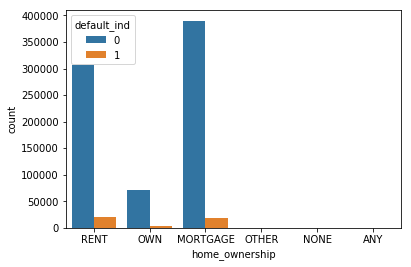

In [45]:
sns.countplot('home_ownership', data = df,hue = 'default_ind')

Text(0, 0.5, 'Count')

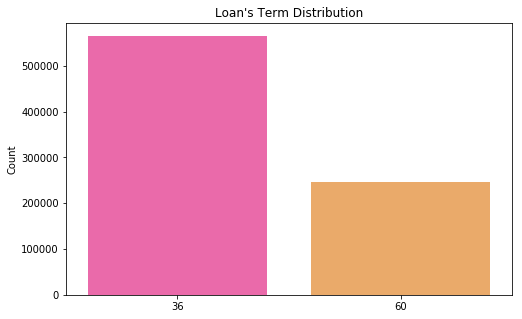

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(y=df.term.value_counts(), x=df.term.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Funded Amount Distribution')

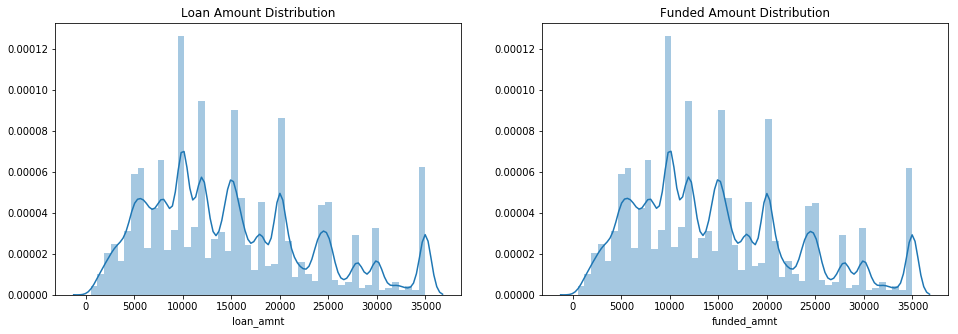

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.distplot(df['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")
sns.distplot(df['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

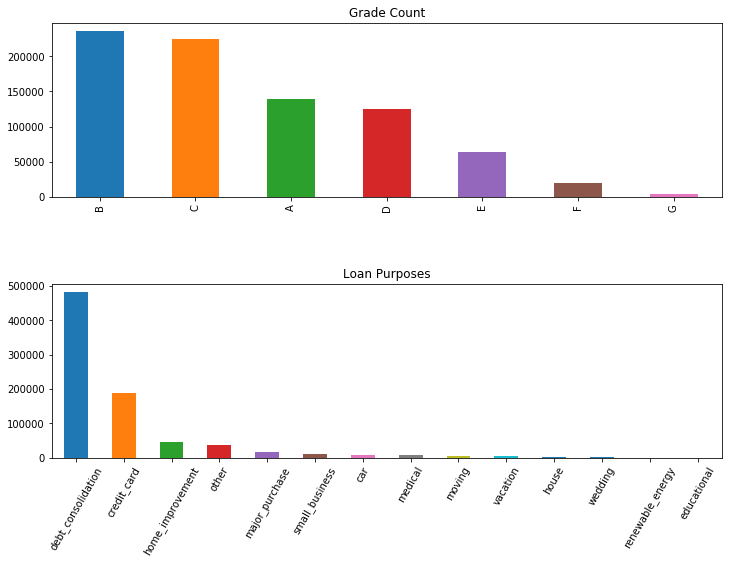

In [48]:
#Let's Checkout the Grades
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(wspace=1.0, hspace=0.50)
df.grade.value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Grade Count")
df.purpose.value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("Loan Purposes")
plt.xticks(rotation=60)

In [49]:
#most of the loans are for debt_consolidation
print(df.purpose.value_counts()[:10])

debt_consolidation    481888
credit_card           189344
home_improvement       46738
other                  38310
major_purchase         15738
small_business          9530
car                     8186
medical                 7621
moving                  4864
vacation                4228
Name: purpose, dtype: int64


Continuous Variables
In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

Categorical Variables
For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

# Univariate function will plot the graphs based on the parameter values.

In [50]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

# Continuous Variables
1. Loan Amount

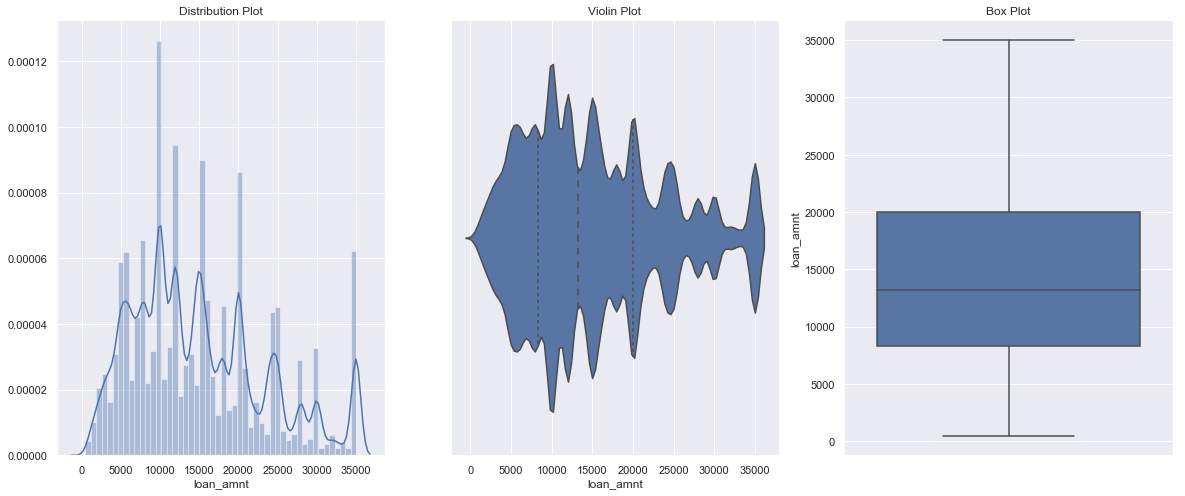

In [51]:
univariate(df,col='loan_amnt',vartype=0)

#Most of the loan amounts are distributed between 8000 to 20000 USD.

2. Interest Rate

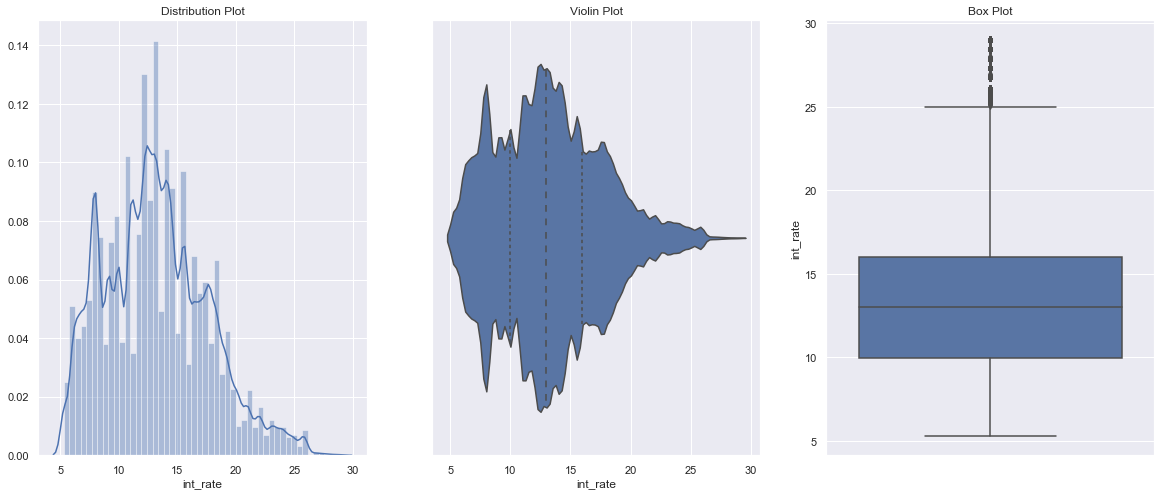

In [52]:
#Insights: Most of the loans interest rates are distributed between 10% to 16%.
univariate(df,col='int_rate',vartype=0)

3. Annual Income

In [53]:
loan["annual_inc"].describe()

count    8.129080e+05
mean     7.639065e+04
std      6.518319e+04
min      3.800000e+03
25%      4.700000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

Max value is 9500000 which is approx 150 times more than mean value, so we will remove the outliers from Annual Income.
Remove Outliers (values from 99 to 100%)

In [54]:
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count    808839.000000
mean      74157.416404
std       40199.464942
min        3800.000000
25%       47000.000000
50%       65000.000000
75%       90000.000000
max      311416.000000
Name: annual_inc, dtype: float64

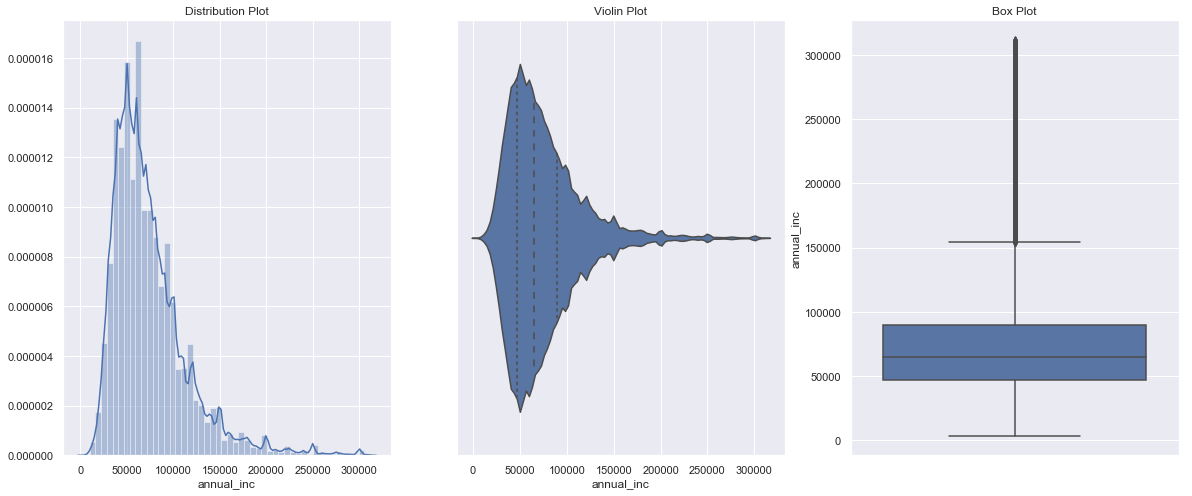

In [55]:
univariate(df=loan,col='annual_inc',vartype=0)

Insights: Most of the applicants earns beteen 40000 to 90000 USD annuall

# Categorical Variables

4. Loan Status

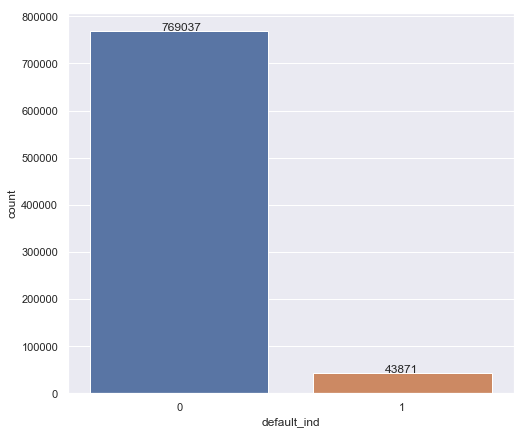

In [56]:
univariate(df,col='default_ind',vartype=1)

5. Purpose Of Loan

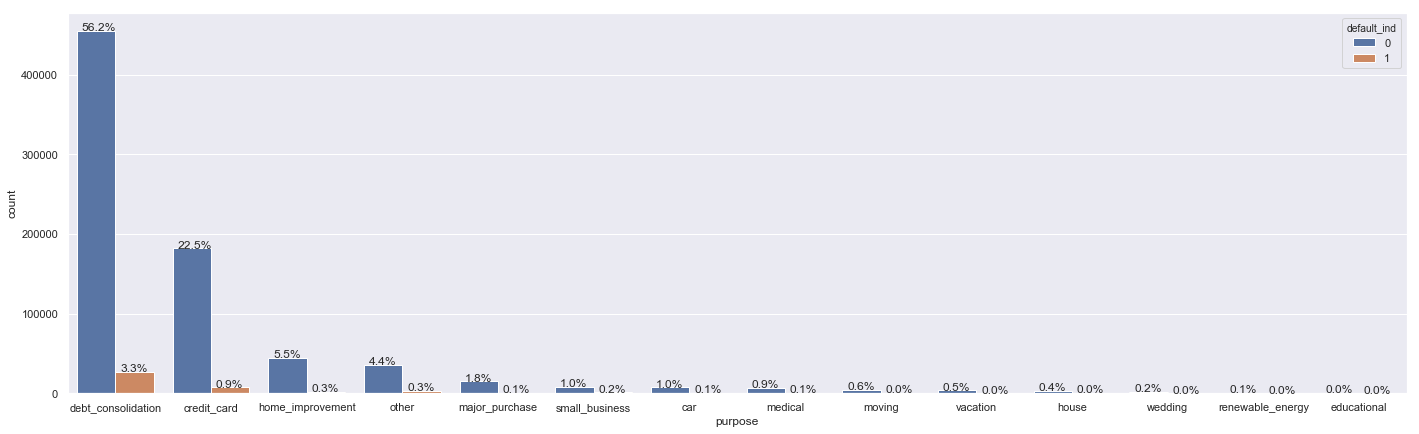

In [57]:
univariate(df,col='purpose',vartype=1,hue='default_ind')

Insights: Approx 60% of the applicants applied loan for paying their other loans(Debt Consolidation).

6. Home Ownership wise Loan

In [58]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [59]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
#rem = ['OTHER', 'NONE', 'ANY']
#df.drop(loan[loan['home_ownership'].isin(rem)].index,inplace=True)
#df.home_ownership.unique()

In [60]:
df['home_ownership'].value_counts()

MORTGAGE    409125
RENT        327698
OWN          75897
OTHER          141
NONE            44
ANY              3
Name: home_ownership, dtype: int64

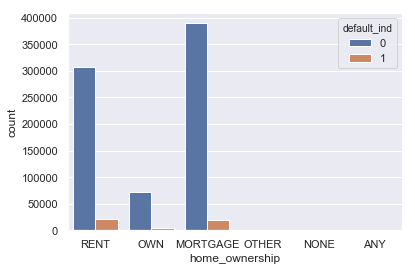

In [61]:
sns.countplot('home_ownership', data = df,hue = 'default_ind')

Insights: 40% of applicants are living in rented home whereas 52% applicants were mortagaged their home.

7. loan Term

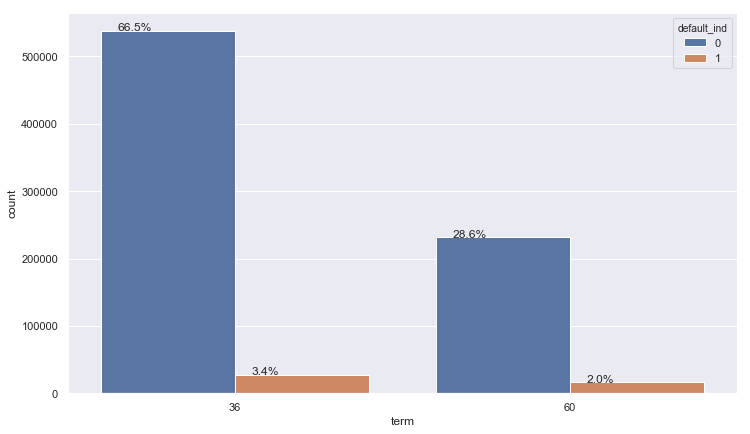

In [62]:
univariate(df,col='term',vartype=1,hue='default_ind')

Insights: 70% of applicants applied loan for 36 months term period.

# Bivariate/Multivariate Analysis

1. Purpose of Loan vs Loan Amount for each Loan Status

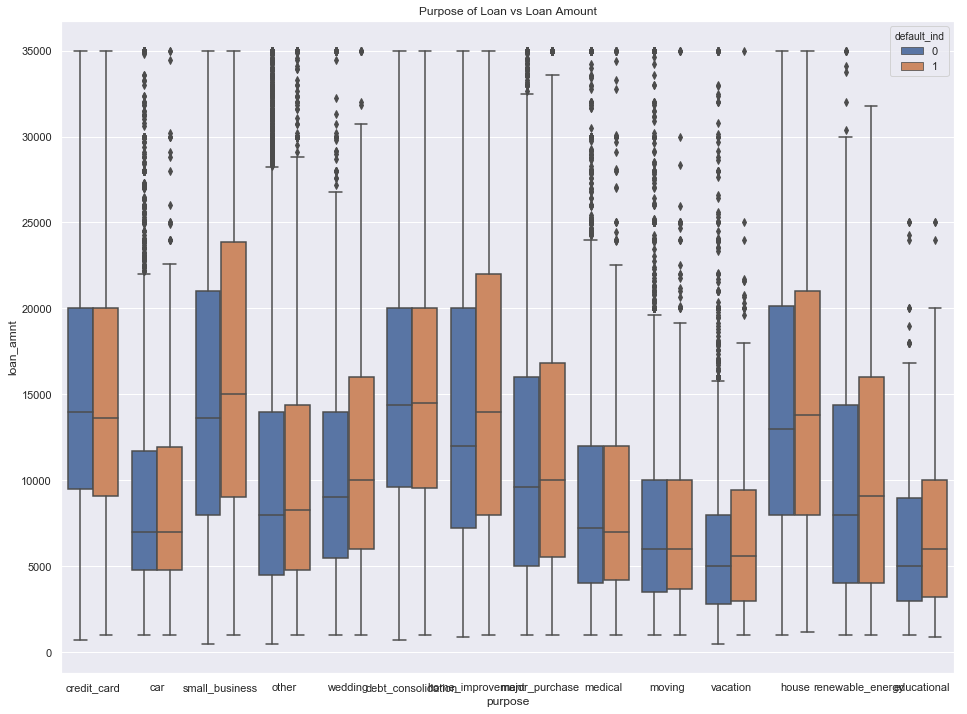

In [63]:
plt.figure(figsize=(16,12))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='default_ind')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

2. Correlation Matrix : All Continuos(Numeric) Variables

In [64]:
df_correlation = df.corr()
df_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
loan_amnt,1.000000,0.999241,0.997503,0.147545,0.944051,0.106210,0.327552,0.046441,-0.017150,0.003139,-0.004067,0.323490,0.309215,-0.003362
funded_amnt,0.999241,1.000000,0.998417,0.147694,0.945112,0.106467,0.327346,0.047283,-0.016990,0.003245,-0.004067,0.323489,0.309214,-0.004278
funded_amnt_inv,0.997503,0.998417,1.000000,0.147950,0.943273,0.107599,0.326719,0.049235,-0.016644,0.003436,-0.004066,0.323513,0.309250,-0.006794
int_rate,0.147545,0.147694,0.147950,1.000000,0.133895,0.010471,-0.073608,0.161965,0.012875,0.026617,0.001228,-0.091952,-0.162165,0.156634
installment,0.944051,0.945112,0.943273,0.133895,1.000000,0.090491,0.321821,0.031068,-0.014607,0.005903,-0.003354,0.292971,0.284237,0.006232
emp_length,0.106210,0.106467,0.107599,0.010471,0.090491,1.000000,0.063858,0.043494,-0.004017,0.009071,-0.000668,0.097809,0.076974,-0.014194
annual_inc,0.327552,0.327346,0.326719,-0.073608,0.321821,0.063858,1.000000,-0.178723,-0.003687,0.014876,0.001132,0.417203,0.269042,-0.036733
dti,0.046441,0.047283,0.049235,0.161965,0.031068,0.043494,-0.178723,1.000000,-0.000105,0.007073,-0.004283,-0.010626,0.072163,0.010403
collections_12_mths_ex_med,-0.017150,-0.016990,-0.016644,0.012875,-0.014607,-0.004017,-0.003687,-0.000105,1.000000,0.040651,0.009268,-0.011002,-0.016942,-0.011019
acc_now_delinq,0.003139,0.003245,0.003436,0.026617,0.005903,0.009071,0.014876,0.007073,0.040651,1.000000,0.000319,0.022997,0.007977,-0.003498


In [65]:
df.shape

(812908, 23)

3. HeatMap: All continuos variables

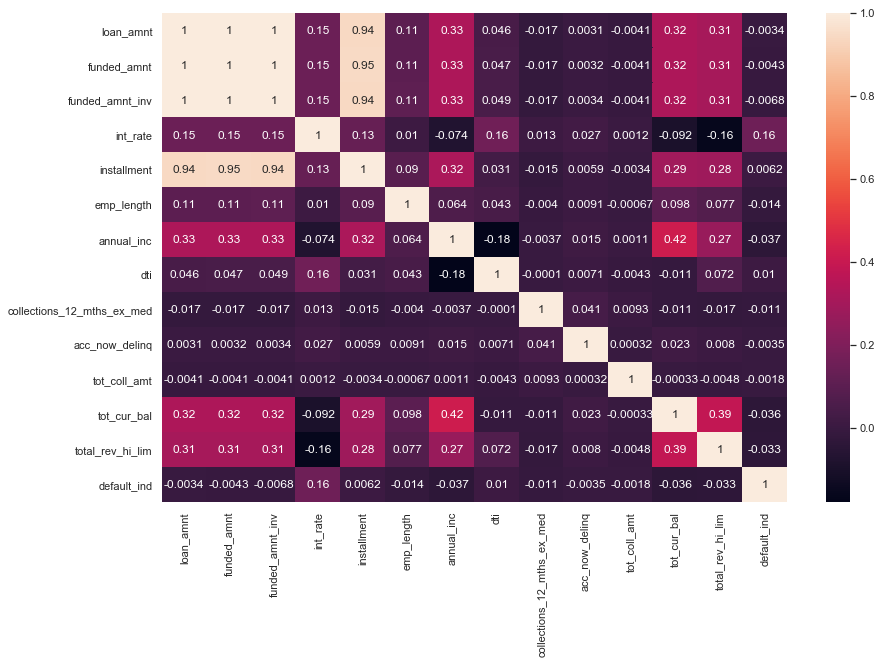

In [66]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(df_correlation, 
            xticklabels=df_correlation.columns.values,
            yticklabels=df_correlation.columns.values,annot= True)
plt.show()

Insights: It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis.

In [67]:
df= df.drop(["loan_amnt","funded_amnt_inv"],axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812908 entries, 0 to 812907
Data columns (total 21 columns):
funded_amnt                   812908 non-null float64
term                          812908 non-null object
int_rate                      812908 non-null float64
installment                   812908 non-null float64
grade                         812908 non-null object
emp_title                     806146 non-null object
emp_length                    812908 non-null int64
home_ownership                812908 non-null object
annual_inc                    812908 non-null float64
verification_status           812908 non-null object
issue_d                       812908 non-null datetime64[ns]
pymnt_plan                    812908 non-null object
purpose                       812908 non-null object
dti                           812908 non-null float64
initial_list_status           812908 non-null object
collections_12_mths_ex_med    812852 non-null float64
acc_now_delinq              

# Data Transformation

In [69]:
df['home_ownership'].value_counts()

MORTGAGE    409125
RENT        327698
OWN          75897
OTHER          141
NONE            44
ANY              3
Name: home_ownership, dtype: int64

In [70]:
df['emp_length'].value_counts()

10    282090
1     122452
2      75986
3      67392
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

# Data encoding

In [71]:
#Data encoding
df['grade'] = df['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df["home_ownership"] = df["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
df["emp_length"] = df["emp_length"].apply(lambda x:int(x))
print("Current shape of dataset :",df.shape)

df.head()

Current shape of dataset : (812908, 21)


,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,36,10.65,162.87,6,NaN,10,5,24000.0,Verified,...,n,credit_card,27.65,f,0.0,0.0,NaN,NaN,NaN,0
1,2500.0,60,15.27,59.83,5,Ryder,1,5,30000.0,Source Verified,...,n,car,1.00,f,0.0,0.0,NaN,NaN,NaN,1
2,2400.0,36,15.96,84.33,5,NaN,10,5,12252.0,Not Verified,...,n,small_business,8.72,f,0.0,0.0,NaN,NaN,NaN,0
3,10000.0,36,13.49,339.31,5,AIR RESOURCES BOARD,10,5,49200.0,Source Verified,...,n,other,20.00,f,0.0,0.0,NaN,NaN,NaN,0
4,3000.0,60,12.69,67.79,6,University Medical Group,1,5,80000.0,Source Verified,...,n,other,17.94,f,0.0,0.0,NaN,NaN,NaN,0


In [72]:
df.grade.unique()

array([6, 5, 7, 3, 2, 4, 1], dtype=int64)

In [73]:
100*(df.isnull().sum()/len(df.index))

funded_amnt                   0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
emp_title                     0.831828
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
pymnt_plan                    0.000000
purpose                       0.000000
dti                           0.000000
initial_list_status           0.000000
collections_12_mths_ex_med    0.006889
acc_now_delinq                0.000000
tot_coll_amt                  8.031905
tot_cur_bal                   8.031905
total_rev_hi_lim              8.031905
default_ind                   0.000000
dtype: float64

filling null value with its mode

In [74]:
df = df.fillna(df.mode())
print("Current shape of dataset :",df.shape)

Current shape of dataset : (812908, 21)


In [75]:
df.drop(labels=['emp_title'],axis=1,inplace=True)

In [76]:
mean = df[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].mean()

In [77]:
df[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']]= df[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].fillna(mean)

In [78]:
df.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
dti                            0
initial_list_status            0
collections_12_mths_ex_med    56
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_hi_lim               0
default_ind                    0
dtype: int64

In [79]:
df.drop('collections_12_mths_ex_med',axis= 1, inplace = True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812908 entries, 0 to 812907
Data columns (total 19 columns):
funded_amnt            812908 non-null float64
term                   812908 non-null object
int_rate               812908 non-null float64
installment            812908 non-null float64
grade                  812908 non-null int64
emp_length             812908 non-null int64
home_ownership         812908 non-null int64
annual_inc             812908 non-null float64
verification_status    812908 non-null object
issue_d                812908 non-null datetime64[ns]
pymnt_plan             812908 non-null object
purpose                812908 non-null object
dti                    812908 non-null float64
initial_list_status    812908 non-null object
acc_now_delinq         812908 non-null float64
tot_coll_amt           812908 non-null float64
tot_cur_bal            812908 non-null float64
total_rev_hi_lim       812908 non-null float64
default_ind            812908 non-null int64
dt

Purpose of loan : Drop records where values are less than 0.75%
We will analyse only those categories which contain more than 0.75% of records. Also, we are not aware what comes under 'Other' we will remove this category as well.

In [81]:
del_df_purpose = (df.purpose.value_counts()*100)/len(df)
del_df_purpose = del_df_purpose[(del_df_purpose < 0.75) | (del_df_purpose.index == 'other')]

df.drop(labels = df[df.purpose.isin(del_df_purpose.index)].index, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")
print(df.purpose.unique())

So now we are left with (759045, 19) rows & columns.
['credit_card' 'car' 'small_business' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical']


In [82]:
df.purpose.head()

0           credit_card
1                   car
2        small_business
6    debt_consolidation
7                   car
Name: purpose, dtype: object

In [83]:
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'debt_consolidation',
       'home_improvement', 'major_purchase', 'medical'], dtype=object)

In [84]:
df['purpose'] = df['purpose'].map({'credit_card':1, 'car':2, 'small_business':3, 'debt_consolidation':4,
       'home_improvement':5, 'major_purchase':6, 'medical':7})

In [85]:
df.purpose.isnull().sum()

0

In [86]:
df.verification_status.head()

0           Verified
1    Source Verified
2       Not Verified
6       Not Verified
7    Source Verified
Name: verification_status, dtype: object

In [87]:
df['verification_status'] = df['verification_status'].map({'Source Verified':3,'Not Verified':2,'Verified':1})
#df['purpose'] = df['purpose'].map({'debt_consolidation':4, 'small_business':3, 'car':2, 'credit_card':1})

In [88]:
df.pymnt_plan.unique()

array(['n', 'y'], dtype=object)

In [89]:
df['pymnt_plan'] = df['pymnt_plan'].map({'n':1, 'y':2})

In [90]:
df.initial_list_status.unique()

array(['f', 'w'], dtype=object)

In [91]:
df['initial_list_status'] = df['initial_list_status'].map({'f':1, 'w':2})

# Machine Learning/Modelling

In [92]:
train = df[df['issue_d'] < '2015-6-01']
test = df[df['issue_d'] >= '2015-6-01']

Deleting date column

In [93]:
del df['issue_d']

In [94]:
X_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

Independent & Dependent Varibles

In [95]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

Sampling

In [96]:
#from imblearn.under_sampling import NearMiss
#os=NearMiss(random_state=42)
#X_res,y_res=os.fit_sample(X,y)

In [97]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_sample(X, y)

Splitting data

In [98]:
X_train,X_test,y_train,y_test=train_test_split(x_train, y_train,test_size=0.25,random_state=0)

In [99]:
np.bincount(y_train)

array([539487, 539413], dtype=int64)

MODELLING

In [100]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_Accuracy =accuracy_score(y_test, lr_pred)
print("Logistic regression accuracy is", lr_Accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression accuracy is 0.6723530033311644


In [101]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, lr_pred))
print(precision_score(y_test, lr_pred))
print(recall_score(y_test, lr_pred))
print(roc_auc_score(y_test, lr_pred))
print("Logistic regression accuracy is", lr_Accuracy)

[[118470  61310]
 [ 56523 123331]]
0.667950238571065
0.6857284241662682
0.6723502505746237
Logistic regression accuracy is 0.6723530033311644


In [102]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Logistic regression accuracy is", lr_Accuracy)
#confusion_matrix(y_test, lr_pred)


[[118470  61310]
 [ 56523 123331]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67    179780
           1       0.67      0.69      0.68    179854

   micro avg       0.67      0.67      0.67    359634
   macro avg       0.67      0.67      0.67    359634
weighted avg       0.67      0.67      0.67    359634

Logistic regression accuracy is 0.6723530033311644


In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 13.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [104]:
clf_pred = clf.predict(X_test)
clf_Accuracy =accuracy_score(y_test, clf_pred)
print("Logistic regression with grid search accuracy is", clf_Accuracy)
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

Logistic regression with grid search accuracy is 0.6723530033311644
[[118470  61310]
 [ 56523 123331]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67    179780
           1       0.67      0.69      0.68    179854

   micro avg       0.67      0.67      0.67    359634
   macro avg       0.67      0.67      0.67    359634
weighted avg       0.67      0.67      0.67    359634



In [105]:
#from sklearn.utils import class_weight

#class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
#model.fit(X_train, y_train, class_weight=class_weights)

In [106]:
import xgboost
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
XGB_Accuracy = accuracy_score(y_test,xgb_pred.round())

In [107]:
print(confusion_matrix(y_test,xgb_pred))
print(precision_score(y_test, xgb_pred))
print(recall_score(y_test, xgb_pred))
print(roc_auc_score(y_test, xgb_pred))
xgb_Accuracy =accuracy_score(y_test, xgb_pred)
print("XGB accuracy is", xgb_Accuracy)

[[178451   1329]
 [ 14100 165754]]
0.9920458694181934
0.9216030780521979
0.9571053548009347
XGB accuracy is 0.9570980496838453


In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))


[[178451   1329]
 [ 14100 165754]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    179780
           1       0.99      0.92      0.96    179854

   micro avg       0.96      0.96      0.96    359634
   macro avg       0.96      0.96      0.96    359634
weighted avg       0.96      0.96      0.96    359634



In [124]:
randomForest=RandomForestClassifier(n_estimators=10, criterion='entropy')
randomForest.fit(X_train,y_train)
rfPredict=randomForest.predict(X_test)
rf_pred_prob=randomForest.predict_proba(X_test)

In [125]:
rf_Accuracy =accuracy_score(y_test, rfPredict)
print("RandomForest accuracy is", rf_Accuracy)
print(precision_score(y_test, rfPredict))
print(recall_score(y_test, rfPredict))
print(roc_auc_score(y_test, rfPredict))
print(confusion_matrix(y_test,rfPredict))

RandomForest accuracy is 0.9690629918194609
0.995349711118418
0.9425422842972634
0.9690684499693015
[[178988    792]
 [ 10334 169520]]


In [111]:
print(confusion_matrix(y_test,rfPredict))
print(classification_report(y_test,rfPredict))

[[179029    751]
 [ 10403 169451]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    179780
           1       1.00      0.94      0.97    179854

   micro avg       0.97      0.97      0.97    359634
   macro avg       0.97      0.97      0.97    359634
weighted avg       0.97      0.97      0.97    359634



In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [113]:
decisiontree = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=1)
decisiontree.fit(X_train, y_train)
dt_pred = decisiontree.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
dt_Accuracy =accuracy_score(y_test, dt_pred)
print("decision tree accuracy is", dt_Accuracy)
print(confusion_matrix(y_test,dt_pred))
print(precision_score(y_test, dt_pred))
print(recall_score(y_test, dt_pred))
print(roc_auc_score(y_test, dt_pred))


decision tree accuracy is 0.7740285957390013
[[132141  47639]
 [ 33628 146226]]
0.7542671446625229
0.8130261211871852
0.7740205697714768


In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [116]:
models=[]
models.append(("logreg",LogisticRegression(solver='liblinear')))
models.append(("tree",DecisionTreeClassifier()))
models.append(("forest",RandomForestClassifier(n_estimators=20)))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("knn",KNeighborsClassifier()))

In [117]:
models

[('logreg',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estima

In [118]:
seed=7
scoring='accuracy'
# Scoring can be 'precision' or 'recall' as well

In [119]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [120]:
for name,model in models:
    kfold=KFold(n_splits=5,random_state=seed)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.671265 0.003169
tree 0.943618 0.000327
forest 0.969696 0.000761
lda 0.700109 0.001127
knn 0.846567 0.000428


In [121]:
from sklearn.metrics import classification_report
print("RF",classification_report(y_test, rfPredict, target_names=None))
print("XGB",classification_report(y_test,xgb_pred, target_names=None))
print("LR",classification_report(y_test,lr_pred, target_names=None))
print("DT",classification_report(y_test, dt_pred, target_names=None))
#print("MLP",classification_report(y_test, predict_NN, target_names=None))

RF               precision    recall  f1-score   support

           0       0.95      1.00      0.97    179780
           1       1.00      0.94      0.97    179854

   micro avg       0.97      0.97      0.97    359634
   macro avg       0.97      0.97      0.97    359634
weighted avg       0.97      0.97      0.97    359634

XGB               precision    recall  f1-score   support

           0       0.93      0.99      0.96    179780
           1       0.99      0.92      0.96    179854

   micro avg       0.96      0.96      0.96    359634
   macro avg       0.96      0.96      0.96    359634
weighted avg       0.96      0.96      0.96    359634

LR               precision    recall  f1-score   support

           0       0.68      0.66      0.67    179780
           1       0.67      0.69      0.68    179854

   micro avg       0.67      0.67      0.67    359634
   macro avg       0.67      0.67      0.67    359634
weighted avg       0.67      0.67      0.67    359634

DT       

EVALUATION METRICS

In [122]:
rf_pred_prob_1=rf_pred_prob[:,1]

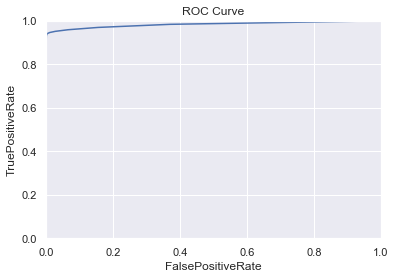

In [123]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,rf_pred_prob_1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid(True)